# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [71]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.3 matplotlib==3.9.4 seaborn==0.13.2 -q

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [72]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [73]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# Read the data from the CSV file
orderData = pd.read_csv('/Users/sudheer/PycharmProjects/practiceProj/FoodHub/foodhub_order.csv')

In [75]:
# Getting the first 5 rows of the dataset to understand its structure
orderData.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [76]:
# Getting the number of rows and columns are present in the dataset
print("There are", orderData.shape[0], 'rows and', orderData.shape[1], "columns.")

# Understanding the order data by getting the statistical summary of the dataset
orderData.describe()

There are 1898 rows and 9 columns.


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Orders & Customers:
1) The dataset contains 1898 orders
2) Each order is linked to a unique customer as customer_id count is also 1898
3) There are total 9 columns in the dataset

Order Costs:
1) Average Cost of orders is $$16.50
2) Minimum Cost of order is $4.47
3) Maximum Cost of order is $35.41
4) 25% of orders are at or below $12.08 value
5) 50% of orders are at or $14.14 value
6) 75th Percentile which means Top 25% of orders are higher than $22.30

Food Preparation Time:
1) Average Preparation Time is 27.37 minutes
2) Minimum Preparation Time is 20 minutes
3) Maximum Preparation Time is 35 minutes

Delivery Time:
1) Average Delivery Time is 24.16 minutes
2) Minimum Delivery Time is 15 minutes (fastest delivery)
3) Maximum Delivery Time is 33 minutes (longest delivery)

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [77]:
# Checking each column datatypes in the dataset
orderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1) The dataset contains 1,898 orders, with 9 columns detailing various attributes of each order.
2) No missing values in any column, ensuring data completeness.
3) The dataset includes both numerical (int64, float64) and categorical (object) variables.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [78]:
# Checking if any missing values in the data
print(orderData.info())
# Count missing values per column
print(orderData.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int

#### Observations:
No missing values in any column, ensuring data completeness.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [79]:
# Getting the minimum, average, and maximum time it takes for food to be prepared once an order is placed

# Calculating food preparation time statistics
min_prep_time = orderData['food_preparation_time'].min()
# Calculating average and maximum food preparation time
avg_prep_time = orderData['food_preparation_time'].mean()
# Calculating maximum food preparation time
max_prep_time = orderData['food_preparation_time'].max()

# Displaying results
print(f"Minimum Food Preparation Time: {min_prep_time} minutes")
print(f"Average Food Preparation Time: {avg_prep_time:.2f} minutes")
print(f"Maximum Food Preparation Time: {max_prep_time} minutes")


Minimum Food Preparation Time: 20 minutes
Average Food Preparation Time: 27.37 minutes
Maximum Food Preparation Time: 35 minutes


#### Observations:
1) Minimum Food Preparation Time: The shortest time taken to prepare food is 20 minutes. This indicates that some orders are processed and ready for pickup relatively quickly.
2) Average Food Preparation Time: On average, it takes about 27.37 minutes for food to be prepared. This suggests that most orders fall within this time frame, providing a benchmark for typical preparation duration.
3) Maximum Food Preparation Time: The longest time taken to prepare food is 35 minutes. This shows that some orders may take significantly longer to prepare, possibly due to complexity or high demand at the restaurant.

### **Question 5:** How many orders are not rated? [1 mark]

In [80]:
# Getting how many orders that are not rated
# Count occurrences of ratings in the 'rating' column
ratingColumnData = orderData['rating'].value_counts()
print(ratingColumnData)
# Count occurrences of "Not given" in the 'rating' column
not_rated_count = ratingColumnData.get("Not given", 0)

# Display the result
print(f"Total number of orders that are not rated : {not_rated_count}")

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
Total number of orders that are not rated : 736


#### Observations:
1) Total Number of Orders Not Rated: There are 736 orders that have not been rated. This indicates a significant portion of customers did not provide feedback, which could be an area for improvement in encouraging customer engagement.
2) Orders with 5 Rating: A total of 588 orders received a 5-star rating. This suggests that a large number of customers are highly satisfied with their orders.
3) Orders with 4 Rating: There are 386 orders with a 4-star rating. This indicates that many customers are generally pleased with their experience, though there may be minor areas for improvement.
4) Orders with 3 Rating: A total of 188 orders received a 3-star rating. This shows that some customers had an average experience, highlighting potential areas where the service could be enhanced to increase satisfaction.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Restaurants

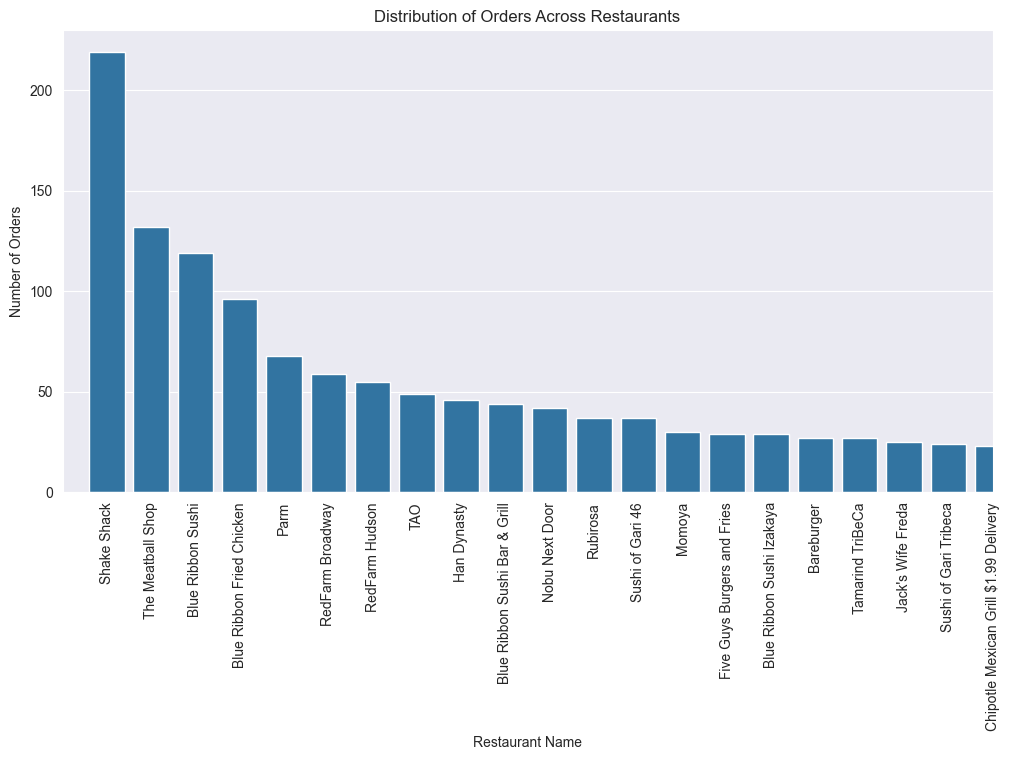

In [81]:
# Exploring the distribution of orders across different restaurants using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=orderData, x='restaurant_name', order=orderData['restaurant_name'].value_counts().index)
# Limiting the x-axis to show only the top 20 restaurants for better visibility
plt.xlim(-1, 20)
plt.xticks(rotation=90)
plt.title('Distribution of Orders Across Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
1) The most popular restaurant is "Shake Shack" with 219 orders.
2) The least popular restaurant is "Wichcraft" with only 1 order.
3) The distribution of orders across restaurants is highly skewed, with a few restaurants receiving a significantly higher number of orders compared to others.
4) The top 10 restaurants account for a substantial portion of the total orders, indicating a strong preference among customers for these establishments.
5) The overall distribution of orders suggests that the company should focus on promoting the top restaurants to maximize customer satisfaction and sales.

#### Cuisine Types

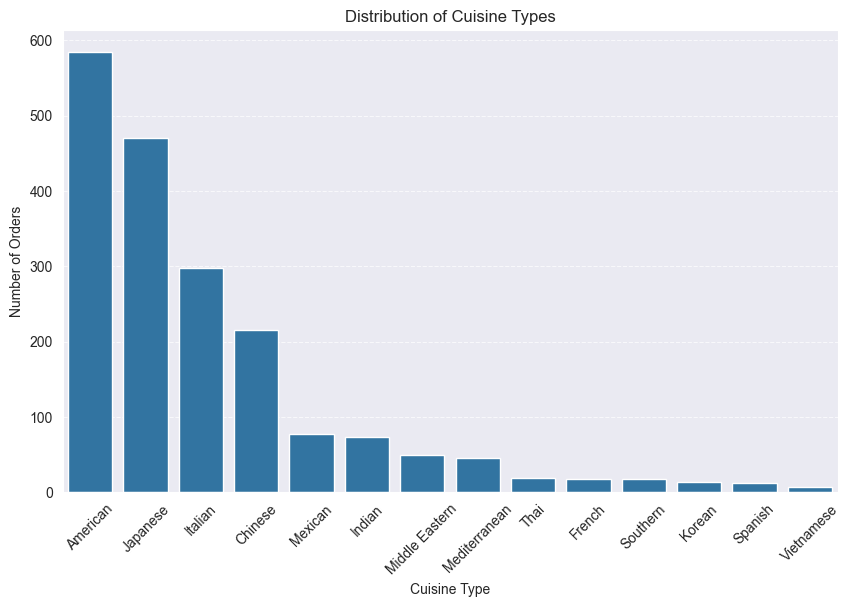

In [82]:
# Exploring the distribution of cuisine types using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=orderData, x='cuisine_type', order=orderData['cuisine_type'].value_counts().index)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
1) The most popular cuisine type is "American" with 584 orders, while "Vietnamese" is the least popular with only 7 orders.
2) The distribution of cuisine types is heavily skewed towards Italian, indicating a strong preference among customers for this cuisine.
3) The "Japanese" cuisine is also popular, with 488 orders.
4) The "Spanish" cuisine has the least number of orders, suggesting it may not be as well-received by customers compared to other cuisines.
5) The distribution of cuisine types is not uniform, with a clear preference for American, Japanese and Italian cuisines over others.



#### Cost of Orders

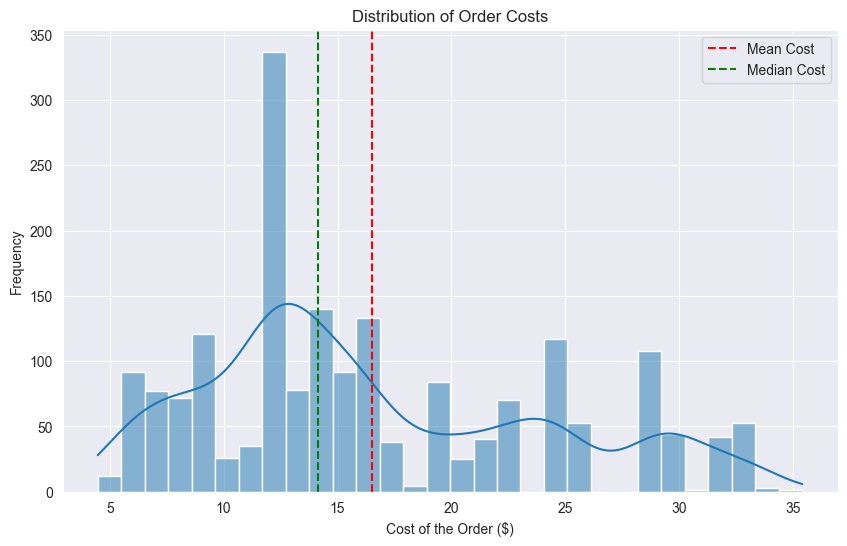

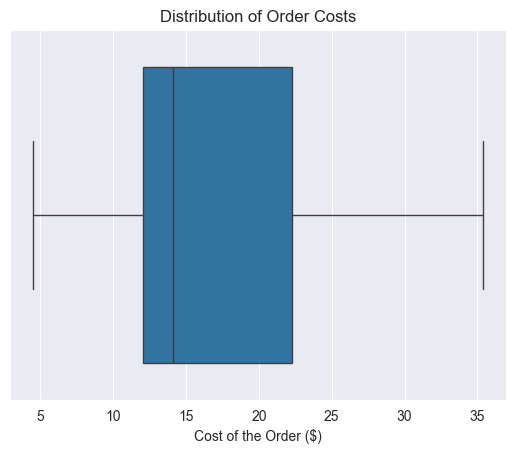

In [112]:
# Exploring the distribution of order costs using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(orderData['cost_of_the_order'], bins=30, kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency')
plt.axvline(orderData['cost_of_the_order'].mean(), color='red', linestyle='--', label='Mean Cost')
plt.axvline(orderData['cost_of_the_order'].median(), color='green', linestyle='--', label='Median Cost')
plt.legend()
plt.show()

## Boxplot for the cost of order
sns.boxplot(data=orderData,x='cost_of_the_order')
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order ($)')
plt.show()

#### Observations:
1) The distribution of order costs is right-skewed, indicating that most orders are on the lower end of the cost spectrum.
2) The mean cost of orders is higher than the median, suggesting the presence of a few high-cost outliers.


#### Day of the Week

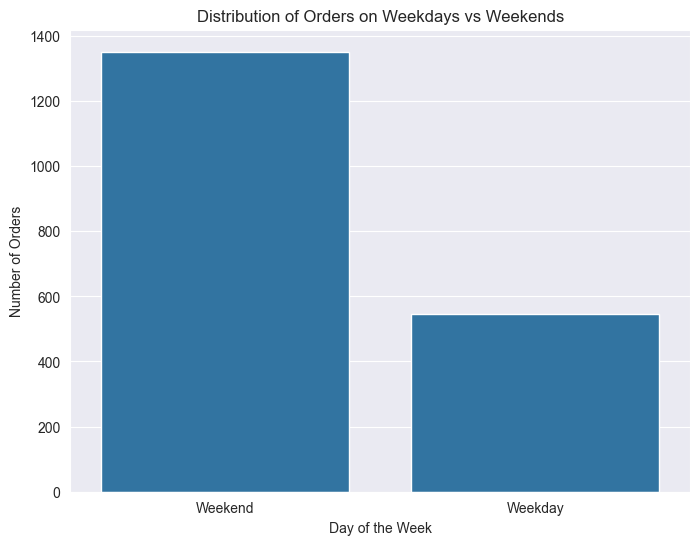

In [84]:
# Exploring the distribution of orders on weekdays vs weekends using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=orderData, x='day_of_the_week', order=orderData['day_of_the_week'].value_counts().index)
plt.title('Distribution of Orders on Weekdays vs Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
1) The distribution of orders shows a clear preference for weekends, with a significantly higher number of orders compared to weekdays.
2) This suggests that customers are more likely to order food during weekends, possibly due to leisure time and social gatherings.
3) The company may consider implementing targeted marketing strategies or promotions for weekends to capitalize on this trend and increase order volume.
4) The company could also analyze customer behavior and preferences on weekdays to identify opportunities for increasing order volume during those days.
5) The company may explore partnerships with local events or activities on weekends to enhance visibility and attract more customers during peak ordering times.
6) The company could consider offering special deals or discounts for weekday orders to encourage customers to order more frequently during those days.

### Ratings

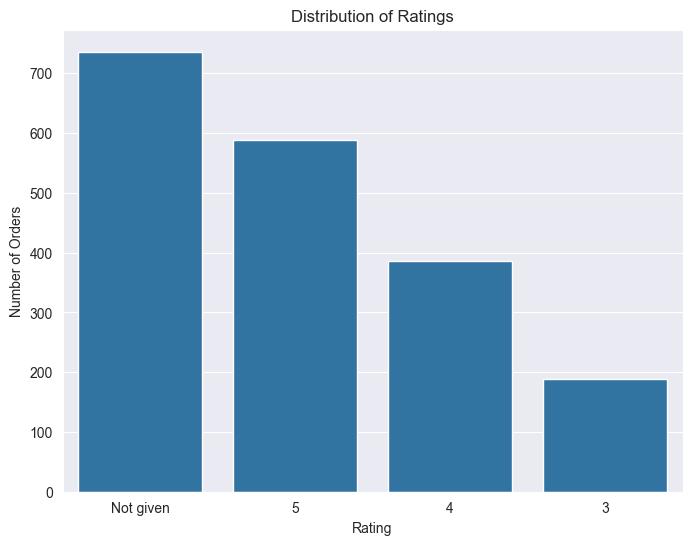

In [85]:
# Exploring the distribution of ratings using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=orderData, x='rating', order=orderData['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
1) The distribution of ratings shows that most orders receive a rating of 5, indicating high customer satisfaction.
2) A significant number of orders also receive a rating of 4, suggesting that customers are generally pleased with their experience.
3) The number of orders with ratings of 3 or lower is relatively low, indicating that most customers have a positive perception of the service.
4) The presence of "Not given" ratings suggests that some customers may choose not to provide feedback, which could be an area for improvement in encouraging customer engagement.

#### Food Preparation Time

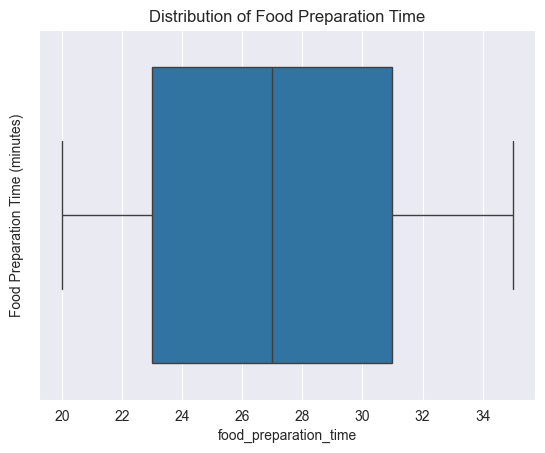

In [86]:
# Exploring the distribution of food preparation time using a boxplot
sns.boxplot(data=orderData, x='food_preparation_time')
plt.title('Distribution of Food Preparation Time')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

#### Observations:
1) The boxplot shows that the median food preparation time is around 27 minutes, with a few outliers indicating longer preparation times.
2) The range suggests that most orders have a preparation time between 20 and 35 minutes.
3) The presence of outliers indicates that some orders may take significantly longer to prepare, which could be due to various factors such as order complexity or restaurant workload.
4) The company may consider analyzing the reasons behind these outliers to identify opportunities for improving food preparation efficiency and reducing wait times for customers.

### Delivery Time


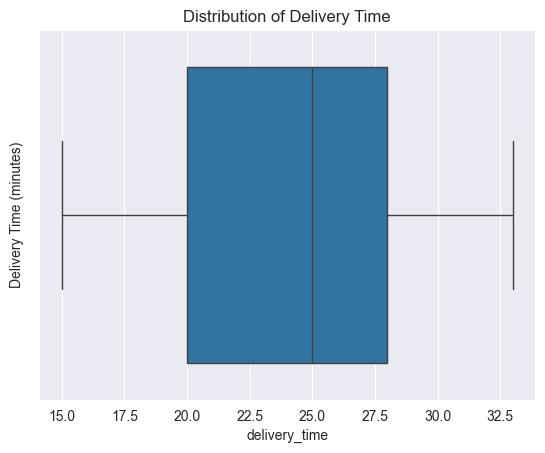

In [87]:
# Exploring the distribution of delivery time using a boxplot
sns.boxplot(data=orderData, x='delivery_time')
plt.title('Distribution of Delivery Time')
plt.ylabel('Delivery Time (minutes)')
plt.show()

#### Observations:
1) The boxplot shows that the median delivery time is around 24 minutes, with a few outliers indicating longer delivery times.
2) The range suggests that most orders have a delivery time between 15 and 33 minutes.
3) The presence of outliers indicates that some orders may take significantly longer to deliver, which could be due to various factors such as traffic conditions or distance from the restaurant to the customer's location.
4) The company may consider analyzing the reasons behind these outliers to identify opportunities for improving delivery efficiency and reducing wait times for customers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [88]:
# Getting the top 5 restaurants in terms of the number of orders received
top_restaurants = orderData['restaurant_name'].value_counts().nlargest(5)
print("Top 5 Restaurants in terms of the number of orders received:")
print(top_restaurants)

Top 5 Restaurants in terms of the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
1) The top 5 restaurants in terms of the number of orders received are:
   - Shake Shack: 219 orders
   - The Meatball Shop: 132 orders
   - Blue Ribbon Sushi: 119 orders
   - Blue Ribbon Fried Chicken: 96 orders
   - Parm: 68 orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [89]:
# Getting the most popular cuisine on weekends
most_popular_weekend_cuisine = orderData[orderData['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", most_popular_weekend_cuisine)

The most popular cuisine on weekends is: American


#### Observations:
1) The most popular cuisine on weekends is "American" with 584 orders.
2) The second most popular cuisine on weekends is "Japanese" with 488 orders.
3) The least popular cuisine on weekends is "Vietnamese" with only 7 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [90]:
# Getting the percentage of orders that cost more than 20 dollars
total_orders = orderData.shape[0]
orders_above_20 = orderData[orderData['cost_of_the_order'] > 20].shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100
print(f"Percentage of orders that cost more than 20 dollars: {percentage_above_20:.2f}%")

Percentage of orders that cost more than 20 dollars: 29.24%


#### Observations:
1) The percentage of orders that cost more than 20 dollars is approximately 29.24%.
2) This indicates that a significant portion of orders are priced above this threshold, suggesting a preference for higher-priced items among customers.
3) The company may consider promoting these higher-priced items to maximize revenue and customer satisfaction.
4) The company could also analyze the factors contributing to the higher costs of these orders, such as restaurant selection or cuisine type, to identify opportunities for targeted marketing and promotions.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [91]:
# Getting the mean order delivery time
mean_delivery_time = orderData['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
1) The mean order delivery time is approximately 24.16 minutes.
2) The delivery times are ranged between 15 and 33 minutes, indicating that most orders are delivered within this time frame.
3) This indicates that, on average, customers can expect their orders to be delivered within this time frame.
4) The company may consider using this information to set customer expectations for delivery times and improve overall customer satisfaction.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [92]:
# Getting the top 3 most frequent customers and their order counts
top_customers = orderData['customer_id'].value_counts().nlargest(3)
print("Top 3 most frequent customers and their order counts:")
print(top_customers)

Top 3 most frequent customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
1) The top 3 most frequent customers are:
   - Customer ID 52832 with 13 orders
   - Customer ID 47440 with 10 orders
   - Customer ID 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine Vs Cost Of The Order

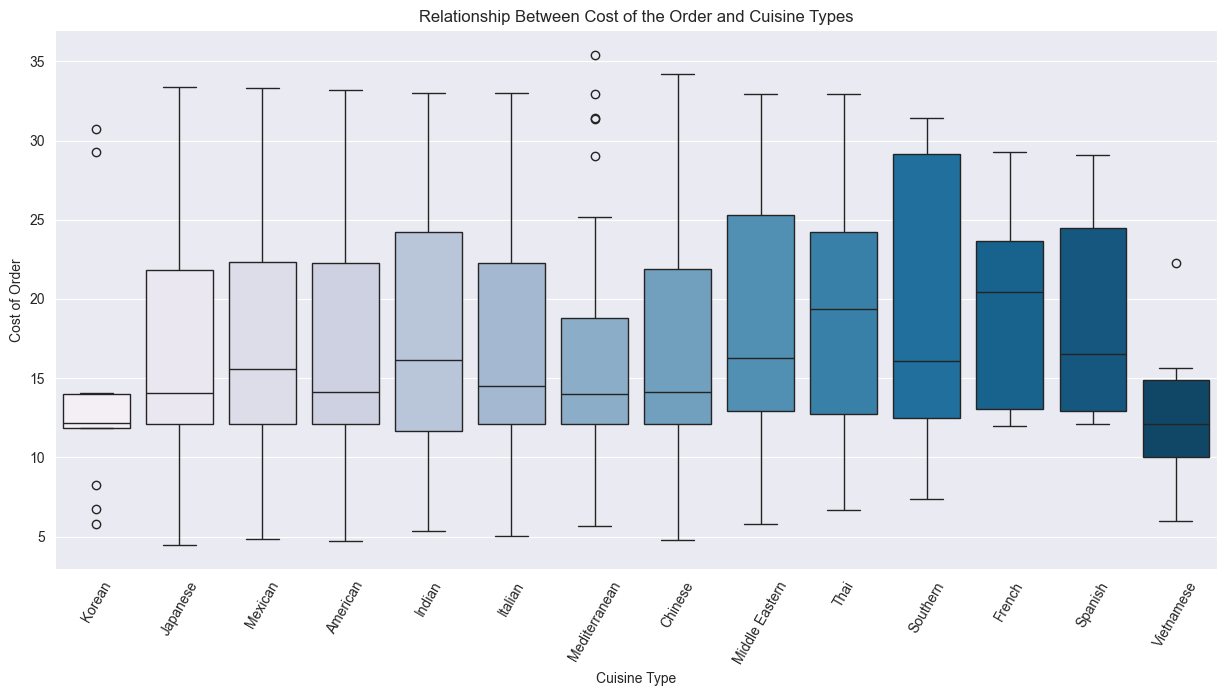

In [93]:
# Exploring the relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = orderData, palette = 'PuBu', hue = "cuisine_type")
plt.title('Relationship Between Cost of the Order and Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

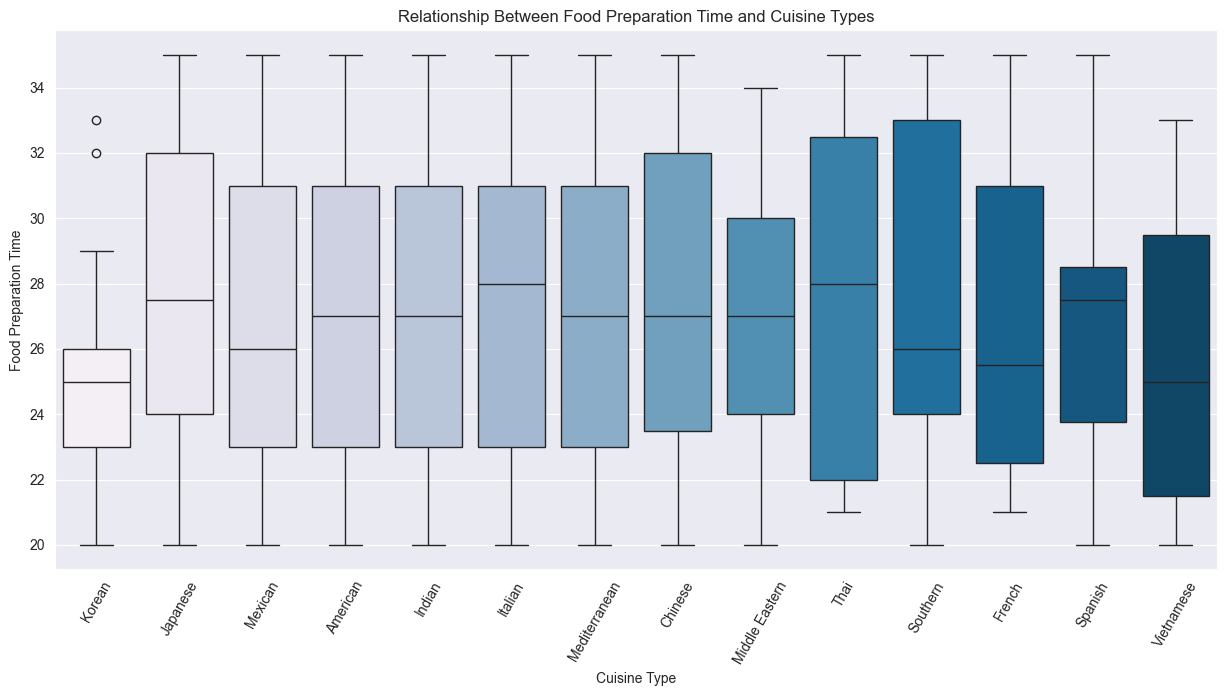

In [94]:
# Exploring relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
## Visualize the relationship between food preparation time and cuisine type using boxplot
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = orderData, palette = 'PuBu', hue = "cuisine_type")
plt.title('Relationship Between Food Preparation Time and Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation = 60)
plt.show()

###  Cuisine vs Rating

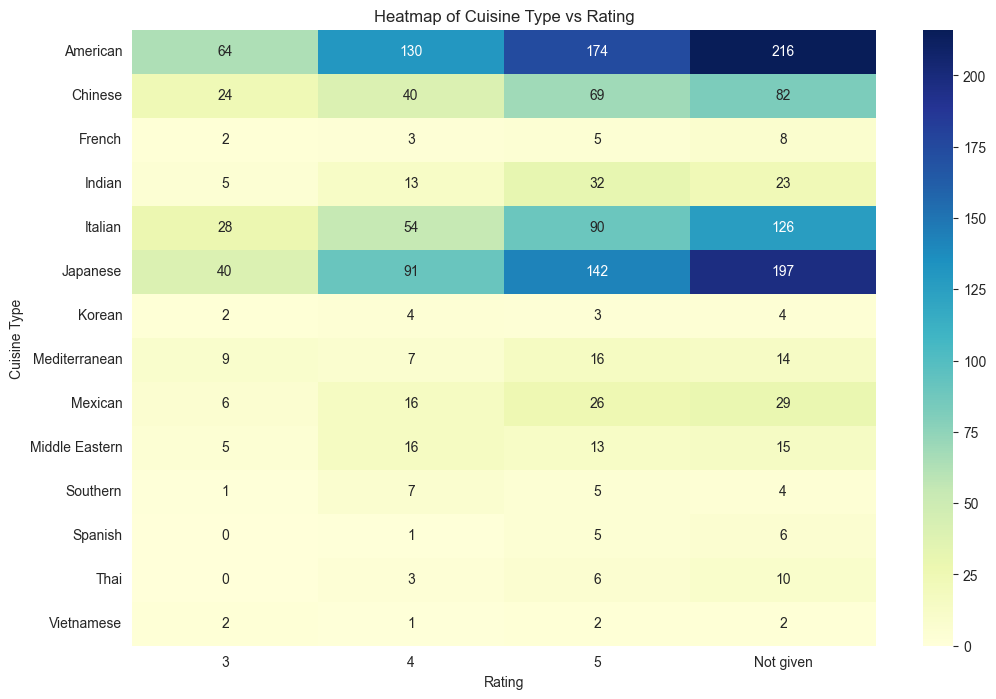

In [95]:
# Exploring the relationship between order cost and rating using a scatter plot
# Creating a pivot table for cuisine type and rating
cuisine_rating_pivot = orderData.pivot_table(index='cuisine_type', columns='rating', values='order_id', aggfunc='count', fill_value=0)

# Creating a heatmap to visualize the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_rating_pivot, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Cuisine Type vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cuisine Type')
plt.show()

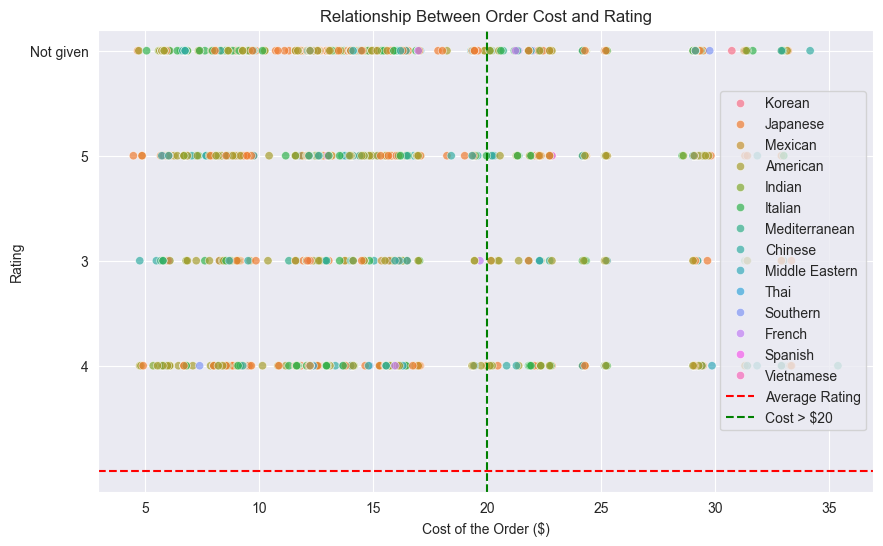

In [96]:
# Exploring the relationship between order cost and rating using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orderData, x='cost_of_the_order', y='rating', hue='cuisine_type', alpha=0.7)
plt.title('Relationship Between Order Cost and Rating')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Rating')
plt.axhline(y=4, color='red', linestyle='--', label='Average Rating')
plt.axvline(x=20, color='green', linestyle='--', label='Cost > $20')
plt.legend()
plt.show()

#### Preparation Time vs Delivery Time

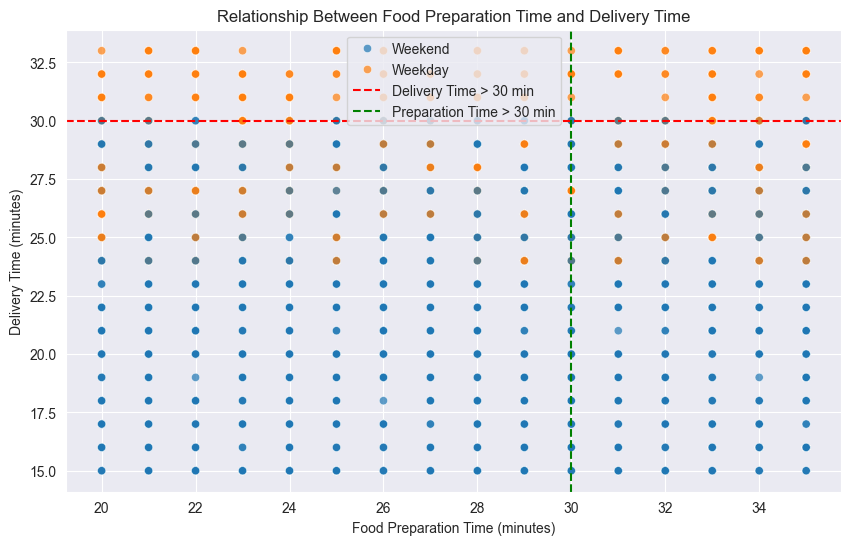

In [97]:
# Exploring the relationship between food preparation time and delivery time using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orderData, x='food_preparation_time', y='delivery_time', hue='day_of_the_week', alpha=0.7)
plt.title('Relationship Between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.axhline(y=30, color='red', linestyle='--', label='Delivery Time > 30 min')
plt.axvline(x=30, color='green', linestyle='--', label='Preparation Time > 30 min')
plt.legend()
plt.show()

#### Rating Vs Delivery Time

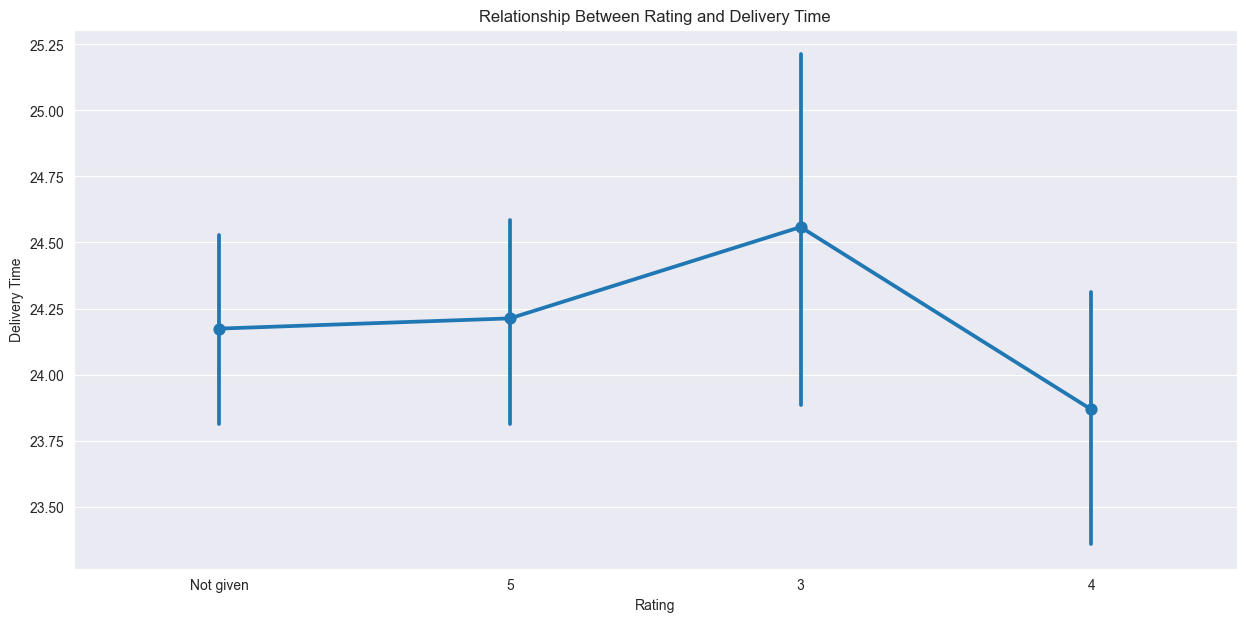

In [98]:
# Exploring relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = orderData)
plt.title('Relationship Between Rating and Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

#### Rating vs Food preparation time

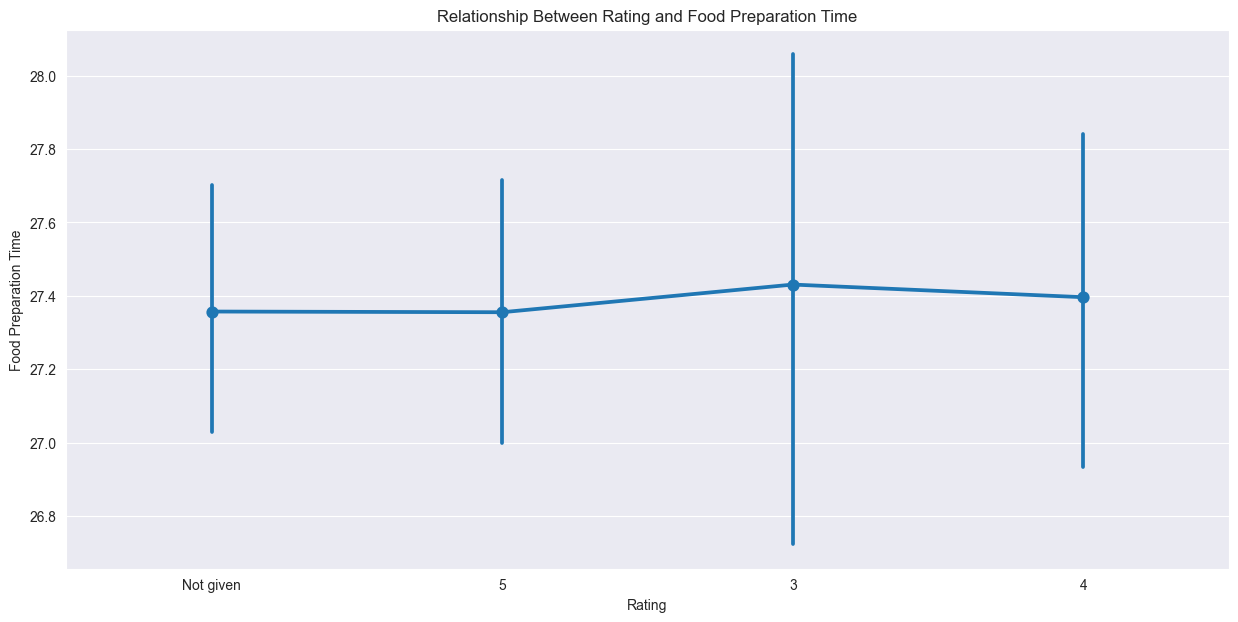

In [99]:
# Exploring relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
# Visualize the relationship between rating and food preparation time using pointplot
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = orderData)
plt.title('Relationship Between Rating and Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()

#### Day of the Week vs Cost

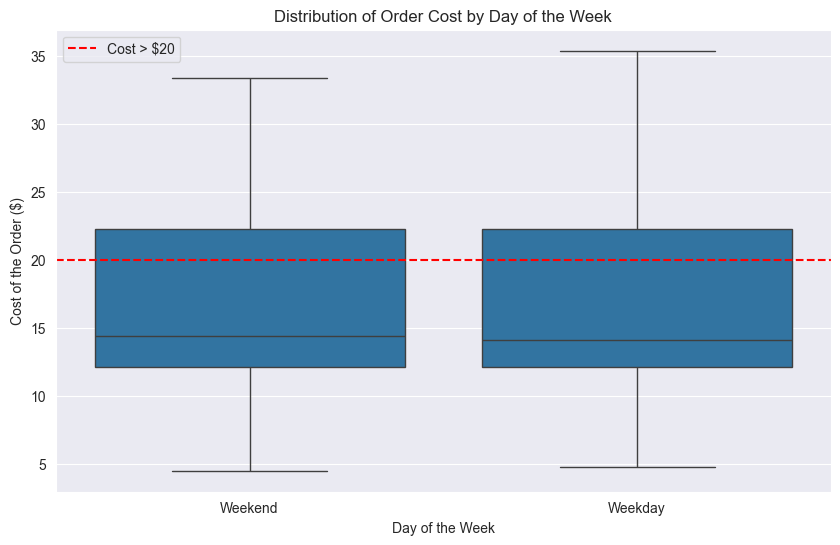

In [100]:
# Exploring the relationship between day of the week and order cost using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=orderData, x='day_of_the_week', y='cost_of_the_order')
plt.title('Distribution of Order Cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order ($)')
plt.axhline(y=20, color='red', linestyle='--', label='Cost > $20')
plt.legend()
plt.show()

### Delivery Time vs Rating

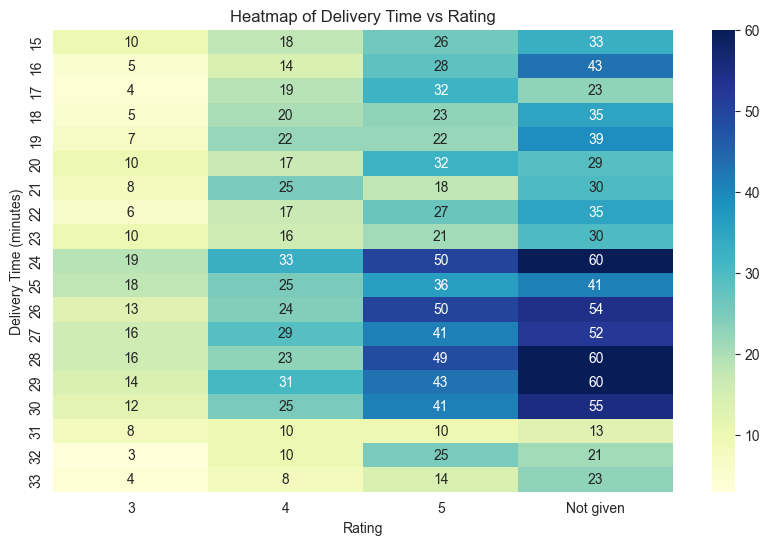

In [101]:
# Exploring the relationship between delivery time and rating using a heatmap
plt.figure(figsize=(10, 6))
# Creating a pivot table for delivery time and rating
delivery_rating_pivot = orderData.pivot_table(index='delivery_time', columns='rating', values='order_id', aggfunc='count', fill_value=0)
# Creating a heatmap to visualize the relationship
sns.heatmap(delivery_rating_pivot, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Delivery Time vs Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

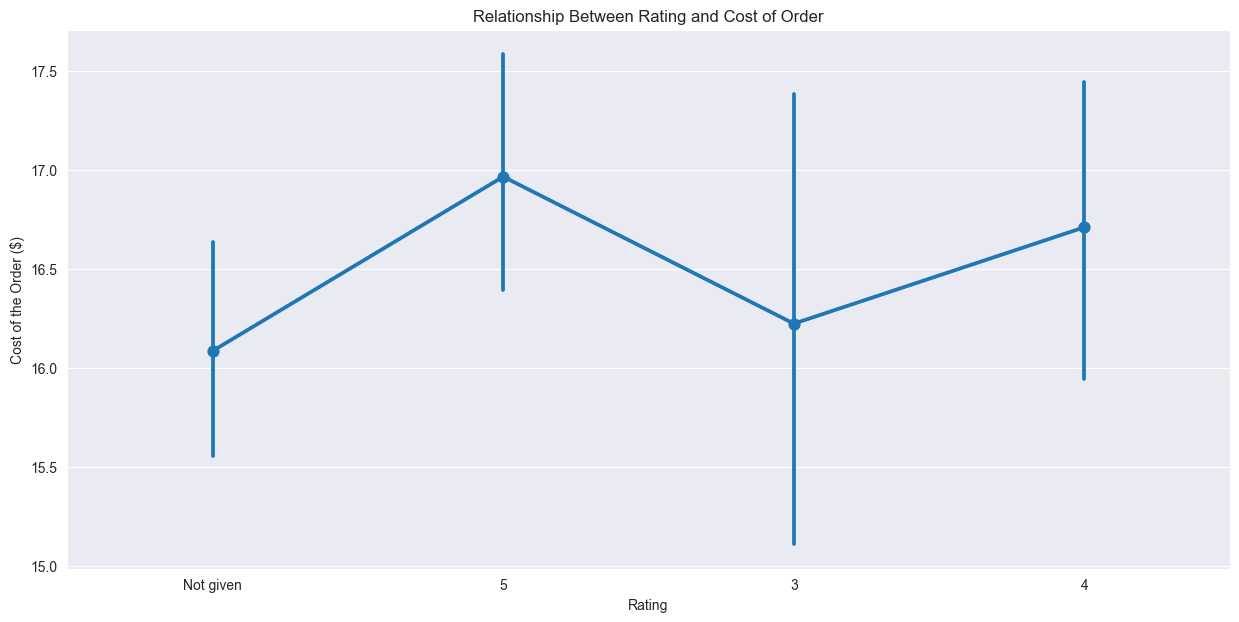

In [102]:
# Exploring relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
# Visualize the relationship between rating and cost of the order using pointplot
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = orderData)
plt.title('Relationship Between Rating and Cost of Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order ($)')
plt.show()

#### Multivariate using Pairplot

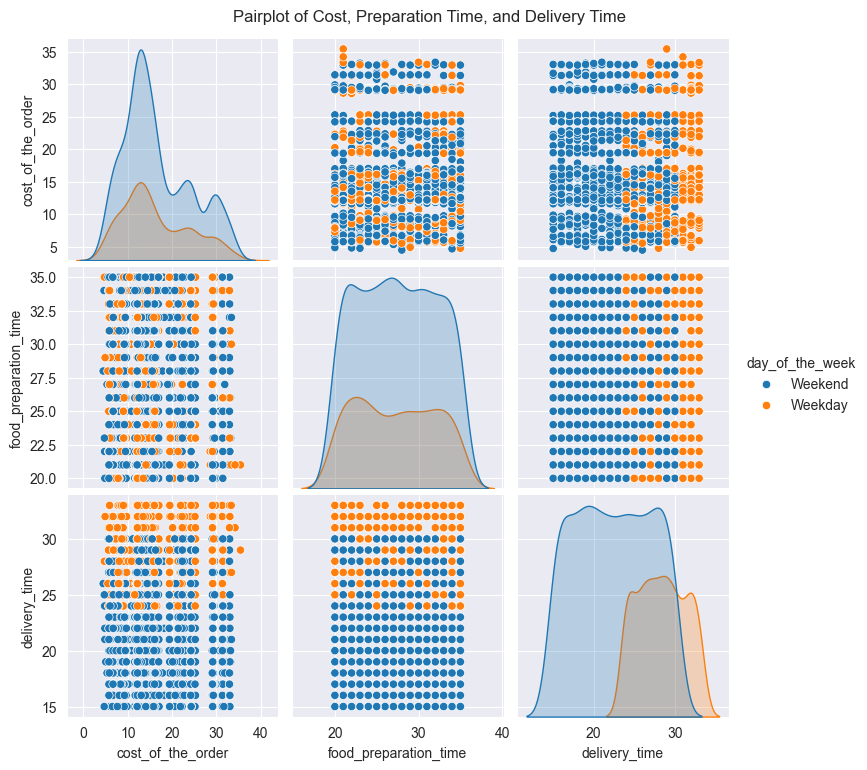

In [103]:
# Exploring the relationships between multiple numerical variables using a pairplot
sns.pairplot(orderData, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='day_of_the_week', diag_kind='kde')
plt.suptitle('Pairplot of Cost, Preparation Time, and Delivery Time', y=1.02)
plt.show()

In [104]:
# Observations on the revenue generated by the restaurants.
orderData.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Correlation among variables

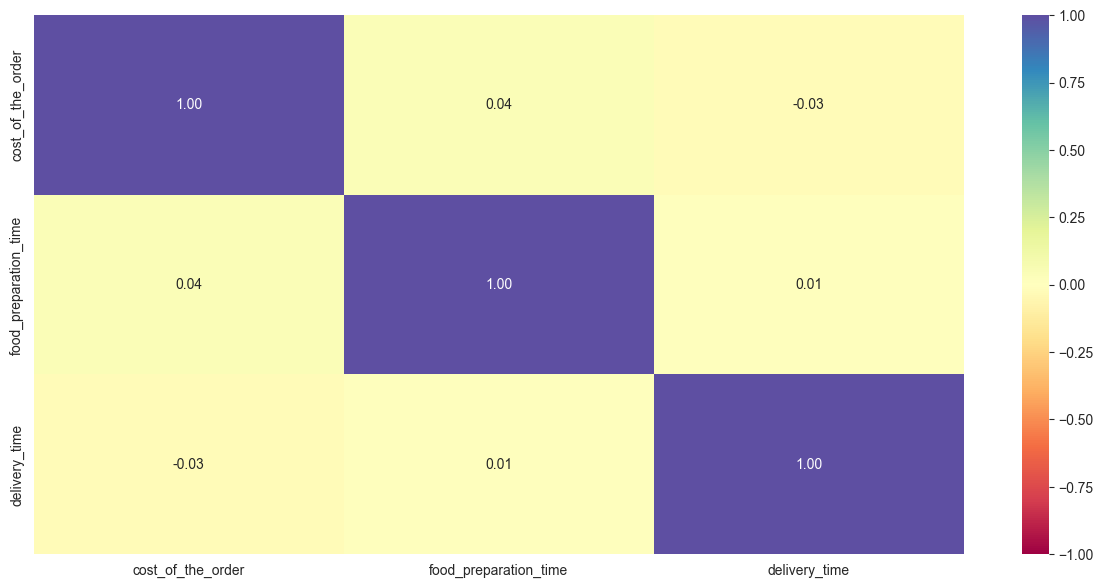

In [105]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(orderData[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [106]:
# Getting restaurants which has rating count of more than 50 and average rating greater than 4

# Converting the 'rating' column to numeric, replacing "Not given" with NaN
orderData['rating'] = pd.to_numeric(orderData['rating'].replace("Not given", np.nan), errors='coerce')
# Grouping by restaurant name to calculate rating count and average rating
promotional_restaurants = orderData.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
# Renaming the columns for clarity
promotional_restaurants.columns = ['rating_count', 'average_rating']
# Resetting the index to make 'restaurant_name' a column
promotional_restaurants = promotional_restaurants[(promotional_restaurants['rating_count'] > 50) & (promotional_restaurants['average_rating'] > 4)]
print("Restaurants fulfilling the criteria for promotional offer:")
print(promotional_restaurants)

Restaurants fulfilling the criteria for promotional offer:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:
Restaurants fulfilling the criteria for promotional offer:
1) Blue Ribbon Fried Chicken: With a rating count of 64 and an average rating of 4.328125, this restaurant meets the criteria for the promotional offer, indicating consistent customer satisfaction.
2) Blue Ribbon Sushi: This restaurant has a rating count of 73 and an average rating of 4.219178, showing that it is well-received by customers and qualifies for the promotional offer.
3) Shake Shack: With the highest rating count of 133 and an average rating of 4.278195, Shake Shack demonstrates strong customer approval and is eligible for the promotional offer.
4) The Meatball Shop: This restaurant has a rating count of 84 and the highest average rating of 4.511905 among the listed restaurants, indicating exceptional customer satisfaction and qualifying it for the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [107]:
# Calculating the net revenue generated by the company across all orders
# Creating a new column for revenue based on the cost of the order
orderData['revenue'] = np.where(orderData['cost_of_the_order'] > 20,
                                   orderData['cost_of_the_order'] * 0.25,
                                   np.where(orderData['cost_of_the_order'] > 5,
                                            orderData['cost_of_the_order'] * 0.15, 0))
# Calculating the total revenue
total_revenue = orderData['revenue'].sum()
print(f"Net revenue generated by the company across all orders: ${total_revenue:.2f}")

Net revenue generated by the company across all orders: $6166.30


#### Observations:
1) The net revenue generated by the company across all orders is approximately $6166.30.
2) This indicates that the company is generating a significant amount of revenue from the orders, especially those with higher costs.
3) The revenue model based on different percentages for different cost ranges is effective in maximizing revenue from orders.
4) The company may consider analyzing the impact of these revenue percentages on customer behavior and order volume to optimize their pricing strategy further.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [108]:
# The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)
# Calculating the total time required to deliver the food
orderData['total_time'] = orderData['food_preparation_time'] + orderData['delivery_time']
# Calculating the percentage of orders that take more than 60 minutes to get delivered
total_orders = orderData.shape[0]
orders_above_60 = orderData[orderData['total_time'] > 60].shape[0]
percentage_above_60 = (orders_above_60 / total_orders) * 100
print(f"Percentage of orders that take more than 60 minutes to get delivered: {percentage_above_60:.2f}%")

Percentage of orders that take more than 60 minutes to get delivered: 10.54%


#### Observations:
1) The percentage of orders that take more than 60 minutes to get delivered is approximately 10.54%.
2) This indicates that a small portion of orders experience longer delivery times, which could be due to various factors such as restaurant workload, traffic conditions, or distance from the restaurant to the customer's location.
3) The company may consider analyzing the reasons behind these longer delivery times to identify opportunities for improving efficiency and reducing wait times for customers.
4) The company could also explore strategies to manage customer expectations regarding delivery times, especially for orders that may take longer than usual.
5) The company may consider implementing a system to notify customers of potential delays in delivery times, allowing them to make informed decisions about their orders.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

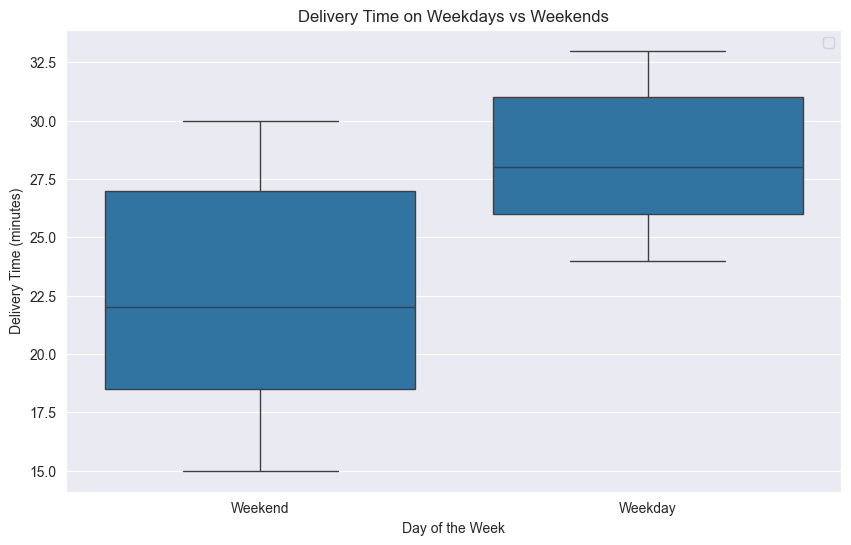

In [109]:
# Exploring the mean delivery time on weekdays and weekends using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=orderData, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time on Weekdays vs Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.legend()
plt.show()

In [110]:
# Calculating the mean delivery time for weekdays and weekends
mean_delivery_time_weekdays = orderData[orderData['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekends = orderData[orderData['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f"Mean delivery time on weekdays: {mean_delivery_time_weekdays:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_delivery_time_weekends:.2f} minutes")

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:
1) The mean delivery time on weekdays is approximately 28.34 minutes, while on weekends it is around 22.47 minutes.
2) The delivery times on weekdays are ranged between 24 and 33 minutes, indicating that most orders are delivered within this time frame.
3) The delivery times on weekends are ranged between 15 and 30 minutes, indicating that most orders are delivered within this time frame.
4) The delivery times are slightly longer on weekdays compared to weekends, which could be due to increased order volume or traffic conditions during weekdays.
5) This indicates that the delivery times are slightly longer on weekends compared to weekdays, which could be due to increased order volume or traffic conditions during weekends.
6) The company may consider analyzing the factors contributing to the longer delivery times on weekends to identify opportunities for improving efficiency and reducing wait times for customers.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The analysis of the FoodHub dataset provides key insights into customer behavior, restaurant performance, and operational efficiency.
* Customer Preferences & Demand Trends
    * Shake Shack is the most popular restaurant with 219 orders, reflecting strong customer preference.
    * American cuisine is the most ordered, followed by Japanese and Italian, indicating high demand for these cuisines.
    * Order volumes peak on weekends, highlighting a key opportunity for strategic promotions.
* Financial Insights
    * The average order cost is $16.50, with a notable percentage exceeding $20.
    * The company generates $6,166.30 in total revenue, suggesting a strong revenue stream.
* Delivery & Operational Performance
    * The mean delivery time is 24.16 minutes, though a small fraction of orders exceed 60 minutes, potentially impacting customer satisfaction.
    * Weekday deliveries tend to take slightly longer than weekends, possibly due to traffic conditions or order volume.
    * Opportunities exist to enhance food preparation and delivery efficiency, reducing wait times for customers.
* Customer Satisfaction & Ratings
    * Most customers are satisfied, as shown by a high number of 5-star ratings.
    * A significant number of orders are not rated, presenting an opportunity to boost customer engagement and feedback collection.
    * Longer delivery times are associated with lower ratings, emphasizing the need for timely service.
    * Higher-cost orders tend to receive better ratings, suggesting a correlation between price and customer satisfaction.
* Strategic Opportunities
    * Certain restaurants meet the criteria for promotional offers based on their ratings and order volume, offering a marketing advantage.
    * Weekend orders tend to have higher average costs, indicating an opportunity for targeted promotions during peak demand periods.
    * Some cuisines receive consistently higher ratings, which could inform menu expansion or targeted advertising.

FoodHub's data-driven insights reveal high revenue potential, strong weekend demand, and customer satisfaction trends. By enhancing delivery efficiency, leveraging high-rated restaurants for promotions, and improving customer engagement, the company can further optimize its operations and maximize revenue.


### Recommendations:
Based on the analysis of FoodHub’s operations and customer behavior, we propose the following strategic recommendations to enhance growth, efficiency, and customer satisfaction:

1. Marketing & Customer Engagement
    * Promote Popular Restaurants & Cuisines: Focus marketing efforts on high-demand restaurants (e.g., Shake Shack) and top cuisines (American, Japanese, Italian) to maximize customer attraction and retention.
    * Targeted Weekend Promotions: Implement discounts or exclusive deals on weekends, when order volumes are highest, to further boost sales.
    * Leverage Social Media & Influencer Marketing: Use social media campaigns to promote top-rated restaurants and limited-time offers, expanding brand reach.
    * Implement Customer Loyalty Programs: Introduce loyalty rewards or subscription-based discounts to encourage repeat orders.

2. Operational Efficiency & Delivery Optimization
    * Reduce Delivery Bottlenecks: Identify factors causing longer delivery times (especially on weekdays) and optimize delivery routes and restaurant fulfillment times.
    * Implement Real-Time Order Tracking & Notifications: Keep customers informed about potential delays via automated notifications, enhancing transparency and satisfaction.
    * Analyze Outliers in Delivery Times: Investigate orders that take more than 60 minutes to pinpoint inefficiencies and improve service.

3. Data-Driven Business Growth
    * Customer Segmentation & Targeted Marketing: Use customer data analytics to segment users based on behavior and preferences, allowing personalized marketing strategies.
    * Evaluate Pricing Strategies: Assess order cost trends and customer willingness to pay to optimize pricing and promotions
    * Expand Restaurant Partnerships: Introduce new restaurant collaborations based on high-rated cuisines to diversify offerings and attract a broader audience.

4. Customer Satisfaction & Feedback Utilization
    * Encourage Customer Reviews & Ratings: Implement incentives for ratings and feedback to gather more insights and improve engagement.
    * Monitor Customer Satisfaction Trends: Regularly track ratings, reviews, and complaints to address service gaps.
    * Improve Order Experience Based on Feedback: Use customer insights to refine the ordering process, delivery experience, and food quality.

5. Strategic Growth & Expansion
    * Evaluate Seasonal Demand Patterns: Identify peak seasons and align promotional strategies accordingly.
    * Explore New Delivery Areas: Expand delivery geographically to capture untapped markets.
    * Monitor Competitor Strategies: Stay ahead by adapting to industry trends and competitive pricing models.

* By implementing these strategies, FoodHub can optimize its operations, improve customer retention, and maximize profitability.



##### Completed by: Sudheer Varma Rudraraju
##### Date: 03/27/2025

---